<img src="http://www.ceic.org.ar/spanish/img/siisa-logo.jpg" align='right'>

# Evaluacion sobre cliente 127 (cartasur)
El cliente 131 responde al grafo y la politica evaluada es la numero 1 que tiene que ver con nuevos. Hago una analisis solo desde el 2018/07/22 hasta el 2019/05/22 porque son 10507 registros y sino el dump de sql explota.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("Client_127_Policy_1_20180122_20190522.cvs", low_memory=False)

In [3]:
df.shape

(19150, 211)

In [4]:
df.head()

,executionId,executionDate,executionDateTime,policyId,policyVersion,decisionResult,apellidoNombre,cartasur_actividadLaboral,cartasur_antLaboralGral,cartasur_canal,...,veraz_observacionesConqui60m,veraz_observacionesMontoCerrada1m,veraz_observacionesMontoCerrada24m,veraz_peorSituacionBureau4m,veraz_peorSituacionBureau5a12m,veraz_peorStatus12,veraz_peorStatusActual,veraz_poblacion,veraz_score,veraz_validado
0,892257,22/05/2018,14:25,1,0,ERROR|error veraz,COLMAN JOSE DOMINGO,,0.0,,...,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,False
1,892258,22/05/2018,14:27,1,0,ERROR|error veraz,COLMAN JOSE DOMINGO,,0.0,,...,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,False
2,892259,22/05/2018,14:28,1,0,RECHAZA|No aprueba score SIISA (745) score VER...,COLMAN JOSE DOMINGO,,0.0,,...,0.0,0.0,0.0,NaN,NaN,1.0,1.0,ok,547.0,False
3,892323,22/05/2018,15:02,1,0,RECHAZA|No aprueba score SIISA (745) score VER...,COLMAN JOSE DOMINGO,,0.0,,...,0.0,0.0,0.0,NaN,NaN,1.0,1.0,ok,547.0,False
4,892388,22/05/2018,15:41,1,0,RECHAZA|No aprueba score SIISA (745) score VER...,COLMAN JOSE DOMINGO,,0.0,,...,0.0,0.0,0.0,NaN,NaN,1.0,1.0,ok,547.0,False


In [5]:
# tienen toda la misma politica??
df.policyId.unique()

array([1], dtype=int64)

In [6]:
# creo una columna que solo me diga si rechazo o califica.
df['decision_filtered'] = df.decisionResult.str.split("|", n = 1, expand = True)[0]

RECHAZA         9161
OK              8491
ERROR            800
ESCALAMIENTO     697
Name: decision_filtered, dtype: int64

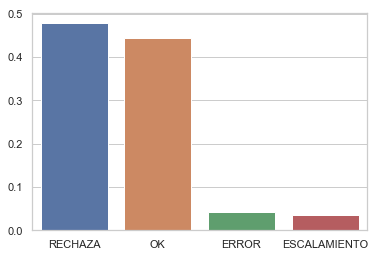

In [7]:
# Simplemente grafico la cantidad que pasa por califica o rechazo.
sns.set(style="whitegrid")
ax =sns.barplot(df.decision_filtered.value_counts().index, df.decision_filtered.value_counts().values/len(df.decision_filtered))
df.decision_filtered.value_counts()

In [8]:
# Genero una nueva columna que tiene que ver con si uso o no veraz por mas que este en dos puntos del arbol.
df['uso_veraz'] = pd.Series(np.repeat('NoUso', len(df.veraz_score)))

In [9]:
# Seteo las ocasiones en las que uso veraz.
df.loc[~df.veraz_score.isna(), 'uso_veraz'] = 'Uso'

In [10]:
# cuento la cantidad de veces que uso.
df.uso_veraz.value_counts()

NoUso    12137
Uso       7013
Name: uso_veraz, dtype: int64

In [11]:
# Tabla de contingencia class(califica/rechaza) / veraz (uso/noUsa) 
pd.crosstab(index=df.uso_veraz,
            columns=df.decision_filtered, margins=True)

decision_filtered,ERROR,ESCALAMIENTO,OK,RECHAZA,All
uso_veraz,,,,,
NoUso,726,403,5195,5812,12136
Uso,74,294,3296,3349,7013
All,800,697,8491,9161,19149


In [12]:
# No me interesa las instancias donde tengo ERROR o ESCALAMIENTO
df = df.drop(df[df.decision_filtered=='ERROR'].index)
df = df.drop(df[df.decision_filtered=='ESCALAMIENTO'].index)

In [13]:
# Tabla de contingencia class(califica/rechaza) / veraz (uso/noUsa) 
pd.crosstab(index=df.uso_veraz,
            columns=df.decision_filtered, margins=True)

decision_filtered,OK,RECHAZA,All
uso_veraz,,,
NoUso,5195,5812,11007
Uso,3296,3349,6645
All,8491,9161,17652


In [14]:
# Estrategia ahora es ver la correlacion de variables utilizadas por siisa y por veraz de modo tal de ver si alguna explica la
# otra.
df_con_veraz = df[df.uso_veraz=='Uso']
df_variables_select = df_con_veraz.filter(regex=r'(siisa*|veraz*)')


In [15]:
df_variables_select.shape

(6645, 117)

In [16]:
df_variables_select.drop(df_variables_select.select_dtypes(['object','bool']), inplace=True, axis=1)

C:\Users\elias\Programs\anaconda3\envs\siisa\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [17]:
# veo cuales variables tienen Nan.
df_variables_select.isna().sum()[df_variables_select.isna().sum() >0].index

Index(['siisa_Dup1', 'siisa_Dup2', 'siisa_Dup3', 'siisa_Dup4',
       'siisa_relDepTel', 'veraz_peorSituacionBureau4m',
       'veraz_peorSituacionBureau5a12m'],
      dtype='object')

In [18]:
# me saco de encima las columnas que tienen toda la columna como Nan y ademas los scores que deberian correlacionar.
df_variables_select.drop(['siisa_Dup1','siisa_Dup2','siisa_Dup3','siisa_Dup4', 'veraz_peorSituacionBureau4m', 'veraz_peorSituacionBureau5a12m', 'siisa_cuil', 'veraz_cuit'], axis=1, inplace=True)

In [19]:
df_variables_select.isna().sum()

siisa_bacCompromiso                   0
siisa_cant1s                          0
siisa_cant2s                          0
siisa_cant3s                          0
siisa_cant4s                          0
siisa_cant5s                          0
siisa_cant6s                          0
siisa_cantCheques                     0
siisa_cantMoras                       0
siisa_cantMorasBCRA                   0
siisa_consultasAno                    0
siisa_consultasDia                    0
siisa_consultasDosAno                 0
siisa_consultasMes                    0
siisa_consultasSeisMeses              0
siisa_consultasSemana                 0
siisa_consultasTresMeses              0
siisa_DupCuil1                        0
siisa_DupCuil2                        0
siisa_DupCuil3                        0
siisa_DupCuil4                        0
siisa_maxBCRA                         0
siisa_maxBCRA12m                      0
siisa_maxBCRA24m                      0
siisa_maxBCRA6m                       0


In [20]:
#df_variables_select=df_variables_select.dropna()

In [21]:
def print_types(df):
    for x in df.columns:
        print(x,df[x].dtype)
print_types(df_variables_select)

siisa_bacCompromiso float64
siisa_cant1s float64
siisa_cant2s float64
siisa_cant3s float64
siisa_cant4s float64
siisa_cant5s float64
siisa_cant6s float64
siisa_cantCheques float64
siisa_cantMoras float64
siisa_cantMorasBCRA float64
siisa_consultasAno float64
siisa_consultasDia float64
siisa_consultasDosAno float64
siisa_consultasMes float64
siisa_consultasSeisMeses float64
siisa_consultasSemana float64
siisa_consultasTresMeses float64
siisa_DupCuil1 float64
siisa_DupCuil2 float64
siisa_DupCuil3 float64
siisa_DupCuil4 float64
siisa_maxBCRA float64
siisa_maxBCRA12m float64
siisa_maxBCRA24m float64
siisa_maxBCRA6m float64
siisa_monto1s float64
siisa_monto2s float64
siisa_monto3s float64
siisa_monto4s float64
siisa_monto5s float64
siisa_monto6s float64
siisa_montoMorasBCRA float64
siisa_nroDoc float64
siisa_operaYcumple float64
siisa_relDepCuit float64
siisa_relDepMeses float64
siisa_relDepTel float64
siisa_score float64
siisa_sesCat float64
siisa_sesModelo float64
veraz_cantCheq12 float64

In [22]:
corr=df_variables_select.corr()

In [23]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
a=get_top_abs_correlations(df_variables_select, 10000)
a=a.dropna()
a_filter=a[a.values > 0.5]
a_filter.to_csv('corr.csv', header=True)

Top Absolute Correlations


In [24]:
a_filter

siisa_consultasAno        siisa_consultasDosAno       0.910068
siisa_maxBCRA             siisa_maxBCRA6m             0.888642
siisa_monto2s             siisa_montoMorasBCRA        0.839548
siisa_consultasAno        siisa_consultasSeisMeses    0.826717
siisa_consultasSeisMeses  siisa_consultasTresMeses    0.788404
siisa_maxBCRA12m          veraz_peorStatus12          0.770593
siisa_cantMorasBCRA       siisa_maxBCRA               0.755800
siisa_consultasMes        siisa_consultasSemana       0.754195
siisa_consultasAno        siisa_consultasTresMeses    0.735316
siisa_consultasDosAno     siisa_consultasSeisMeses    0.734451
siisa_consultasMes        siisa_consultasTresMeses    0.734375
veraz_peorStatus12        veraz_peorStatusActual      0.734346
siisa_maxBCRA12m          siisa_maxBCRA6m             0.715675
siisa_cant2s              siisa_cantMorasBCRA         0.713422
siisa_maxBCRA12m          siisa_maxBCRA24m            0.705820
siisa_maxBCRA             veraz_peorStatusActual      0

6645


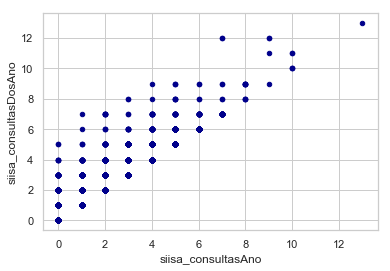

In [25]:
print(len(df_variables_select))
pair1 = df_variables_select.plot.scatter(x='siisa_consultasAno', y='siisa_consultasDosAno', c='DarkBlue')

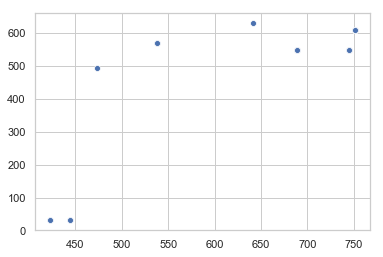

In [52]:
#ax = sns.scatterplot(x="siisa_score", y="veraz_score", data=df_variables_select)
scores_siisa=df_variables_select.siisa_score[:50].to_numpy()
scores_veraz=df_variables_select.veraz_score[:50].to_numpy()
ax= sns.scatterplot(x=scores_siisa,y=scores_veraz)

In [42]:
scores[['siisa_score','veraz_score']]

,siisa_score,veraz_score
2,745.0,547.0
3,745.0,547.0
4,745.0,547.0
5,745.0,547.0
6,745.0,547.0
7,689.0,547.0
8,689.0,547.0
9,689.0,547.0
10,689.0,547.0
11,689.0,547.0


In [27]:
df[['executionId','siisa_maxBCRA12m', 'veraz_peorStatus12']][df['veraz_peorStatus12']>5]

,executionId,siisa_maxBCRA12m,veraz_peorStatus12
969,952830,0.0,9.0
1275,954419,5.0,6.0
2946,963420,0.0,9.0
3132,964138,5.0,9.0
4038,968274,3.0,9.0
4459,970701,3.0,6.0
5635,975821,3.0,9.0
5849,976695,4.0,9.0
6216,978221,0.0,6.0
6478,979380,5.0,9.0
